# Tasks: Mar-02 - Room - 1156



### Imports

- Matplotlib is used for plotting

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
import numpy as np
import pandas as pd
import matplotlib.dates as md
from bokeh.layouts import row
output_notebook()
import warnings
warnings.filterwarnings('ignore')

Loading BokehJS ...

## Read the data ##

- Create separate data frames for each template

In [2]:
# Read the DAta for room 1156 into the pandas dataframe.
df = pd.read_csv('data/rm1156.csv', names=['sensor_id', 'timestamp', 'value', 'room', 'template'],
                 parse_dates=['timestamp']).drop_duplicates().sort_values(by='timestamp')

# Separate the data for each template
zt = df[df.template == 'Zone Temperature'][['timestamp', 'value']]
dp = df[df.template == 'Damper Position'][['timestamp', 'value']]
asf = df[df.template == 'Actual Supply Flow'][['timestamp', 'value']]
acsp = df[df.template == 'Actual Cooling Setpoint'][['timestamp', 'value']]
ahsp = df[df.template == 'Actual Heating Setpoint'][['timestamp', 'value']]

### Create Plot for the two template together to see co-relation. Each template on different axis.

In [3]:
def plot_signals_twinx(df, signal_list,  start_date=None, end_date=None):
#     ['Actual Supply Flow', 'Damper Position', 'Actual Cooling Setpoint', 'Actual Heating Setpoint']
#     signal_list = ['Damper Position',  'Actual Cooling Setpoint']    
#     start_date="2014-04-27"
#     end_date="2014-05-04"

    # Setup the figure for the plot using matplotlib

    fig, ax1 = plt.subplots(figsize=(22, 12))

    dates = pd.date_range(start_date, end_date, freq='3H')
    y = np.random.random(dates.size)
    locator = md.HourLocator(range(0, 24, 6))
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M')

    ax1.xaxis.set(major_formatter=xfmt, major_locator=locator)

    ax1.grid()
    plt.title("Signals for Rm1156", fontsize=20)
    ax1.set_xlabel("Date")
    ax1.set_ylabel("value", color='red')


    data = df[df.template == signal_list[0]]
    if not len(data):
        print "No data for signal", signal_list[0]
        # Filter based on dates
    else:
        if not start_date == None:
            data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
                (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
            if not len(data):
                print "Invalid date range. no data found for ",  signal_list[0]
            else: 
                # Plotting based on matplotlib
                ax1.plot(data.timestamp, data.value, color='red', label=signal_list[0])
                ax1.legend(loc=2)

    data = df[df.template == signal_list[1]] 
    if not len(data):
        print "No data for signal", signal_list[1]
    else:
        if not start_date == None:
            data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
                (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
            if not len(data):
                print "Invalid date range. no data found for ",  signal_list[1]
            else:
                ax2 = ax1.twinx()
                ax2.plot(data.timestamp, data.value, color='#0000FF', label=signal_list[1])
                ax2.set_ylabel('Value', color='#0000FF')
                ax2.legend(loc=1)
    ## Set the Ticks        
    fig.tight_layout()


    for label in ax1.get_xmajorticklabels() :
        label.set_rotation(45)
        label.set_horizontalalignment("right")

## Winter
### Plot  Damper Position and Actual Cooling Setpoint between "2015-02-08" and "2015-02-15"  Every three hours
#### Observation ####

1. We see that in a given week ( Sunday to Sunday)  the  Damper Position and Actual Cooling Setpoint have the same fluctuation and looks highly correlated
2. Damper Position fluctuates every 3 hours

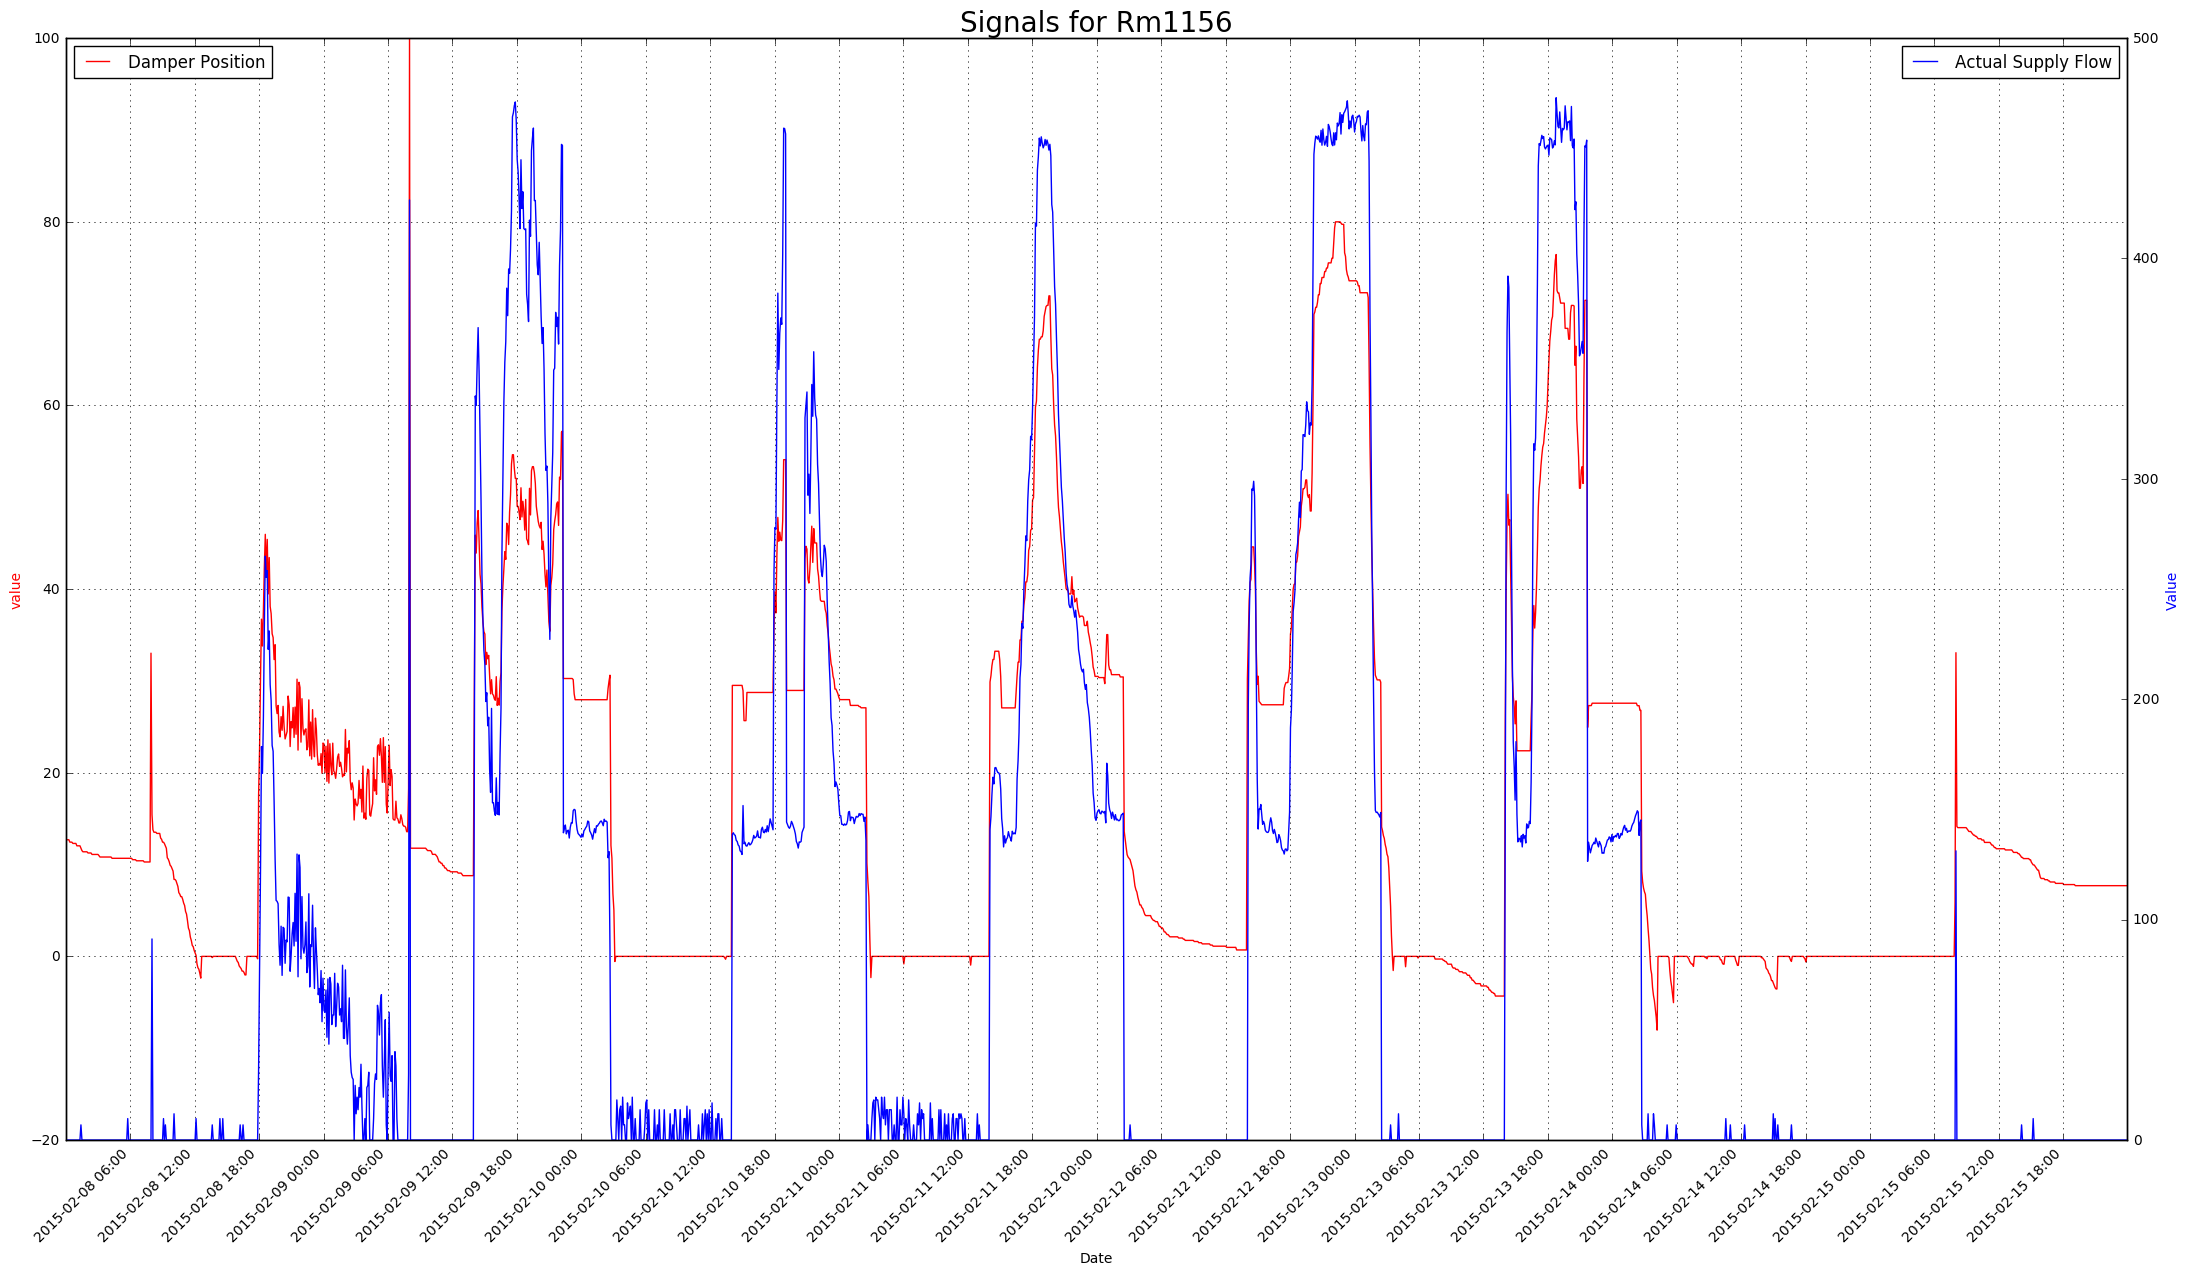

In [4]:
plot_signals_twinx(df, signal_list=['Damper Position',  'Actual Supply Flow'],  start_date="2015-02-08", end_date="2015-02-15")

### Plot  Damper Position and Actual Heating Setpoint between "2015-05-09" and "2015-05-10"  Every three hours
#### Observation ####

1. We see that in a given week ( Sunday to Sunday) Damper Position fluctuates.
2. There is no data for Actual Heating Setpoint

In [5]:
# plot_signals_twinx(df, signal_list=['Damper Position',  'Actual Supply Flow'],  start_date="2015-05-09", end_date="2015-05-10")

## Summer
### Plot  Damper Position and Actual Supply Flow between "2015-05-10" and "2015-05-17"  Every three hours
#### Observation ####

1. We see that in a given week ( Sunday to Sunday) Damper Position fluctuates in corelation with Actual Supply Flow
2. Dual Axis has been used as range of data varies


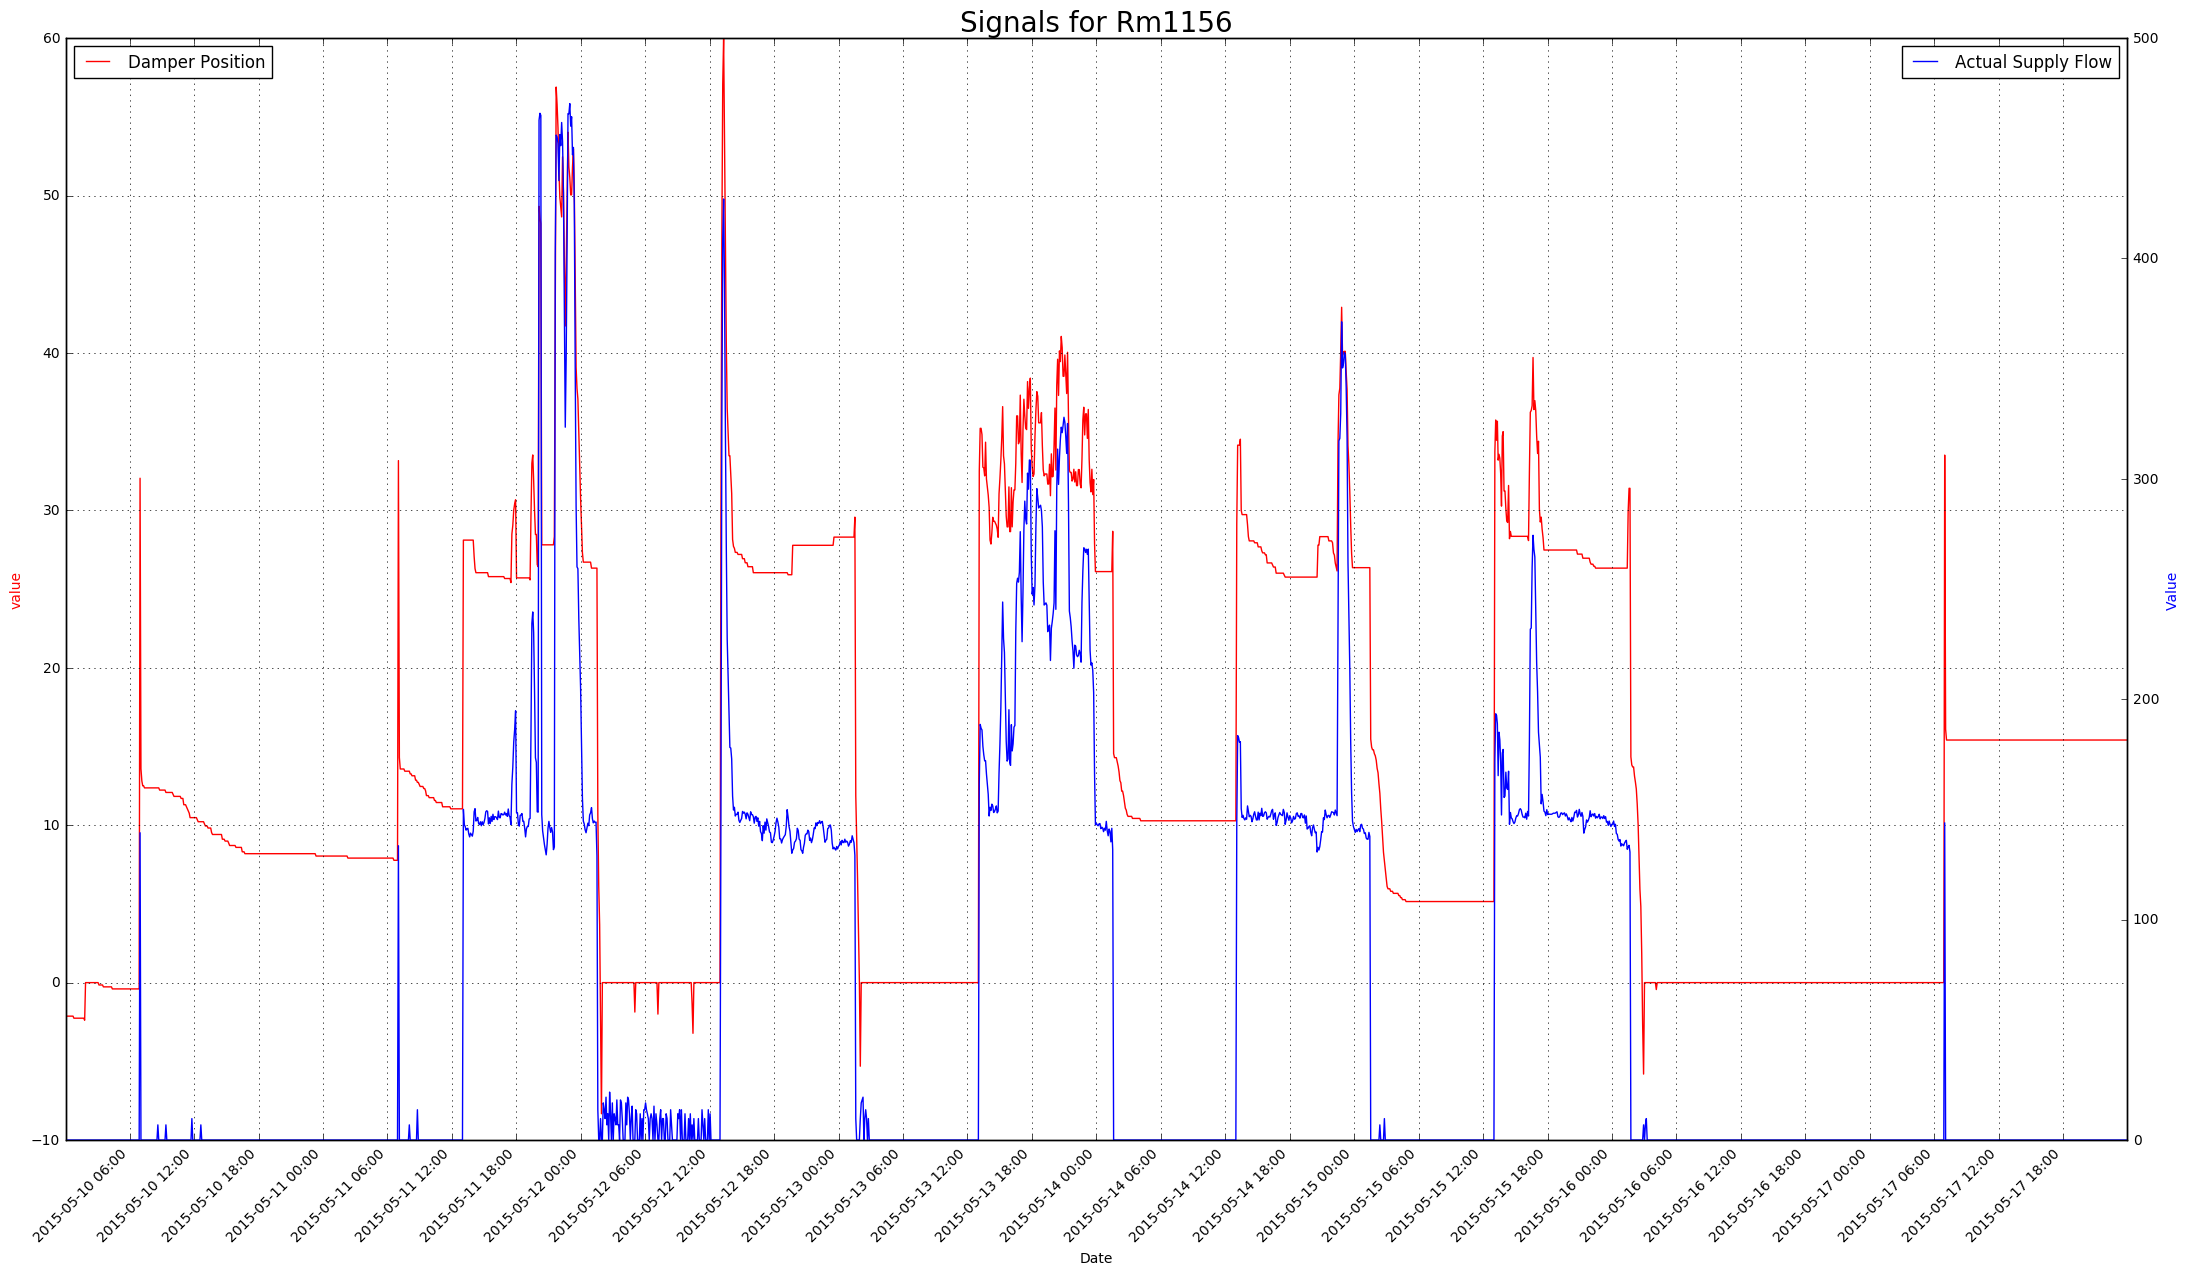

In [6]:
plot_signals_twinx(df, signal_list=['Damper Position',  'Actual Supply Flow'],  start_date="2015-05-10", end_date="2015-05-17")

In [7]:
def plot_signals_template(df, start_date=None, end_date=None):
    signal_list=['Actual Heating Setpoint', 'Actual Cooling Setpoint',
       'Damper Position', 'Zone Temperature', 'Actual Supply Flow']

    # Setup the figure for the plot using matplotlib
    
    # Create all axes we need
    fig = plt.figure(figsize=(12, 30))

#     plt.tight_layout()
    fig = plt.gcf()
    
    dates = pd.date_range(start_date, end_date, freq='3H')
    locator = md.HourLocator(range(0, 24, 6))
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M')

    data = df[df.template == signal_list[0]]
    if not len(data):
        print "No data for signal", signal_list[0]
        # Filter based on dates
    else:
        if not start_date == None:
            data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
                (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
            if not len(data):
                print "Invalid date range. no data found for ",  signal_list[0]
            else: 
                ax1 = fig.add_subplot(511)
                ax1.xaxis.set(major_formatter=xfmt, major_locator=locator)
                # Plotting based on matplotlib
                ax1.plot(data.timestamp, data.value, color='black', label=signal_list[0])
                plt.grid()
                ax1.set_xlabel("Date",color='red' )
                ax1.set_ylabel("value", color='blue')
                ax1.legend(loc=2)
                for label in ax1.get_xmajorticklabels() :
                    label.set_rotation(30)
                    label.set_horizontalalignment("right")


    data = df[df.template == signal_list[1]] 
    if not len(data):
        print "No data for signal", signal_list[1]
    else:
        if not start_date == None:
            data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
                (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
            if not len(data):
                print "Invalid date range. no data found for ",  signal_list[1]
            else:
                ax2 = fig.add_subplot(512)
                ax2.xaxis.set(major_formatter=xfmt, major_locator=locator)
                ax2.plot(data.timestamp, data.value, color='blue', label=signal_list[1])
                plt.grid()
                ax2.set_xlabel("Date",color='red' )
                ax2.set_ylabel("value", color='blue')
                ax2.legend(loc=2)

                for label in ax2.get_xmajorticklabels() :
                    label.set_rotation(30)
                    label.set_horizontalalignment("right")
     
    # Signal 3 in the list    
    data = df[df.template == signal_list[2]]
    if not len(data):
        print "No data for signal", signal_list[2]
        # Filter based on dates
    else:
        if not start_date == None:
            data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
                (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
            if not len(data):
                print "Invalid date range. no data found for ",  signal_list[2]
            else: 
                # Plotting based on matplotlib
                ax3 = fig.add_subplot(513)
                ax3.xaxis.set(major_formatter=xfmt, major_locator=locator)
                ax3.plot(data.timestamp, data.value, color='green', label=signal_list[2])
                plt.grid()
                ax3.xaxis.set(major_formatter=xfmt, major_locator=locator)
                ax3.set_xlabel("Date",color='red' )
                ax3.set_ylabel("value", color='blue')
                ax3.legend(loc=2)

                for label in ax3.get_xmajorticklabels() :
                    label.set_rotation(30)
                    label.set_horizontalalignment("right") 
    
    # Signal 4 in the list
    data = df[df.template == signal_list[3]] 
    if not len(data):
        print "No data for signal", signal_list[3]
    else:
        if not start_date == None:
            data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
                (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
            if not len(data):
                print "Invalid date range. no data found for ",  signal_list[3]
            else:
                ax4 = fig.add_subplot(514)
                ax4.xaxis.set(major_formatter=xfmt, major_locator=locator)         
                ax4.plot(data.timestamp, data.value, color='orange', label=signal_list[3])
                plt.grid()
                ax4.set_xlabel("Date",color='red' )
                ax4.set_ylabel("value", color='blue')
                ax4.legend(loc=2)
  
                for label in ax4.get_xmajorticklabels() :
                    label.set_rotation(30)
                    label.set_horizontalalignment("right") 
                
                
                    # Signal 5 in the list
    data = df[df.template == signal_list[4]] 
    if not len(data):
        print "No data for signal", signal_list[4]
    else:
        if not start_date == None:
            data = data[(data.timestamp.dt.date >= pd.to_datetime(start_date).date()) &
                (data.timestamp.dt.date <= pd.to_datetime(end_date).date())]
            if not len(data):
                print "Invalid date range. no data found for ",  signal_list[4]
            else:
                ax4 = fig.add_subplot(515)
                ax4.xaxis.set(major_formatter=xfmt, major_locator=locator)         
                ax4.plot(data.timestamp, data.value, color='red', label=signal_list[4])
                plt.grid()
                ax4.set_xlabel("Date",color='red' )
                ax4.set_ylabel("value", color='blue')
                ax4.legend(loc=2)
  
                for label in ax4.get_xmajorticklabels() :
                    label.set_rotation(30)
                    label.set_horizontalalignment("right") 


### Summer Plots for two days ( 5/17 - Sunday and 5/18- Monday)

#### Observations 5/17 - Sunday
        1. Actual Cooling setpoint is static except one drop at the same time on both days..
        2. Damper position is in negatively corelation with Actual Cooling setpoint.
#### Observations 5/18 - Monday
        1. Durimg Summer Actual Cooling setpoint tends to decrease after 6:00 PM till midnight
        2. Damper position is in negatively corelation with Actual Cooling setpoint.
        3. Actual Supply flow is in corelations with Damper position 
        

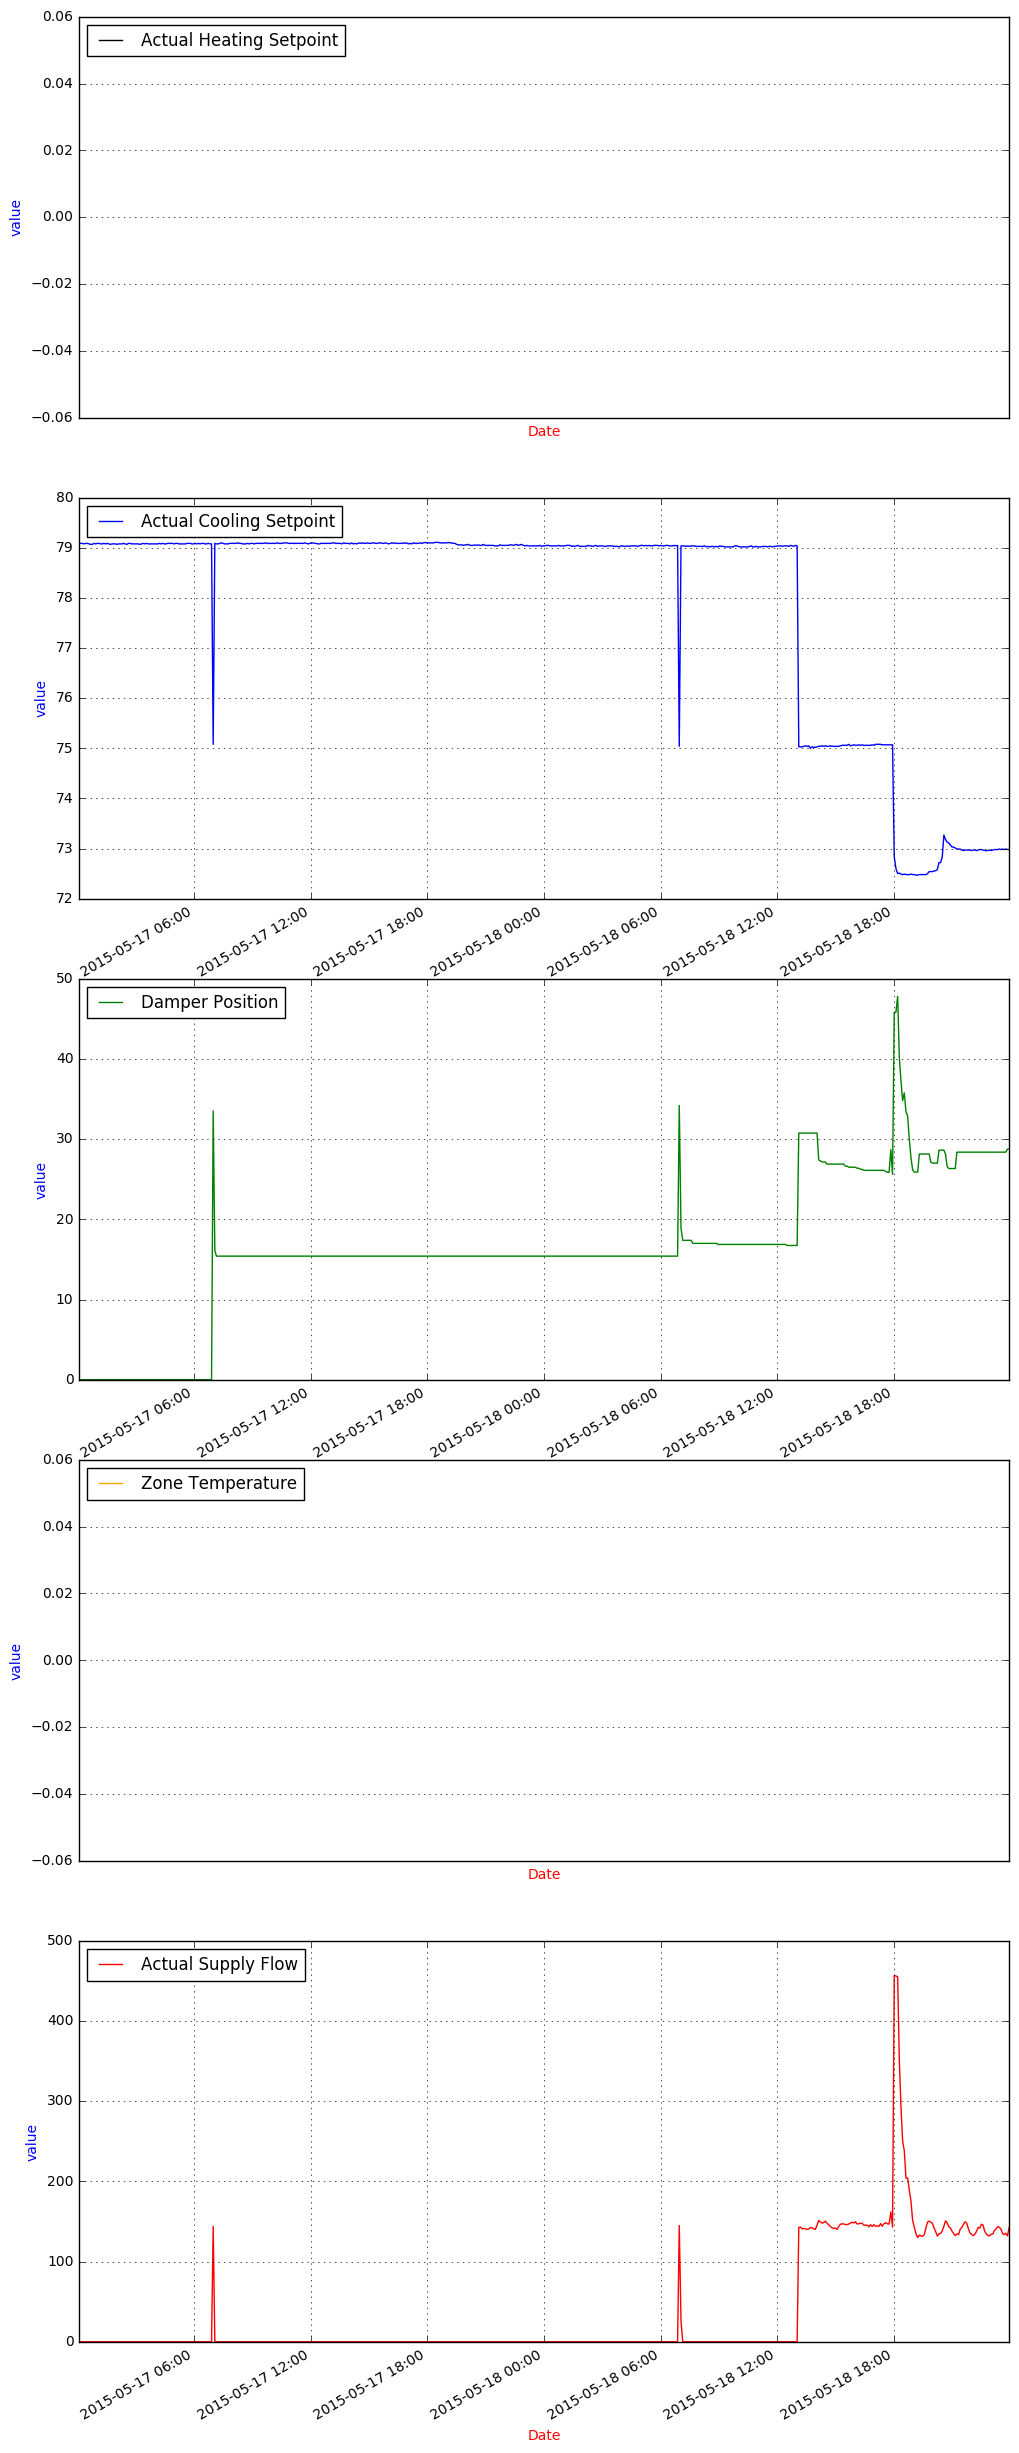

In [8]:
plot_signals_template(df,  start_date="2015-05-17", end_date="2015-05-18")

###  Summer Plot  two consecutive dates "2015-05-28" and "2015-05-29"
#### Observations
        1. Durimg Summer Actual Supply flow tens to increase after 6:00 PM till midnight
        2. Damper position is in negaively corelation with Actual Supply workflow.
        3. Zone Temperature is null for all the dats for the room 1156
        
        
        conclusion- Summer plots follow same pattren as Winter plot.

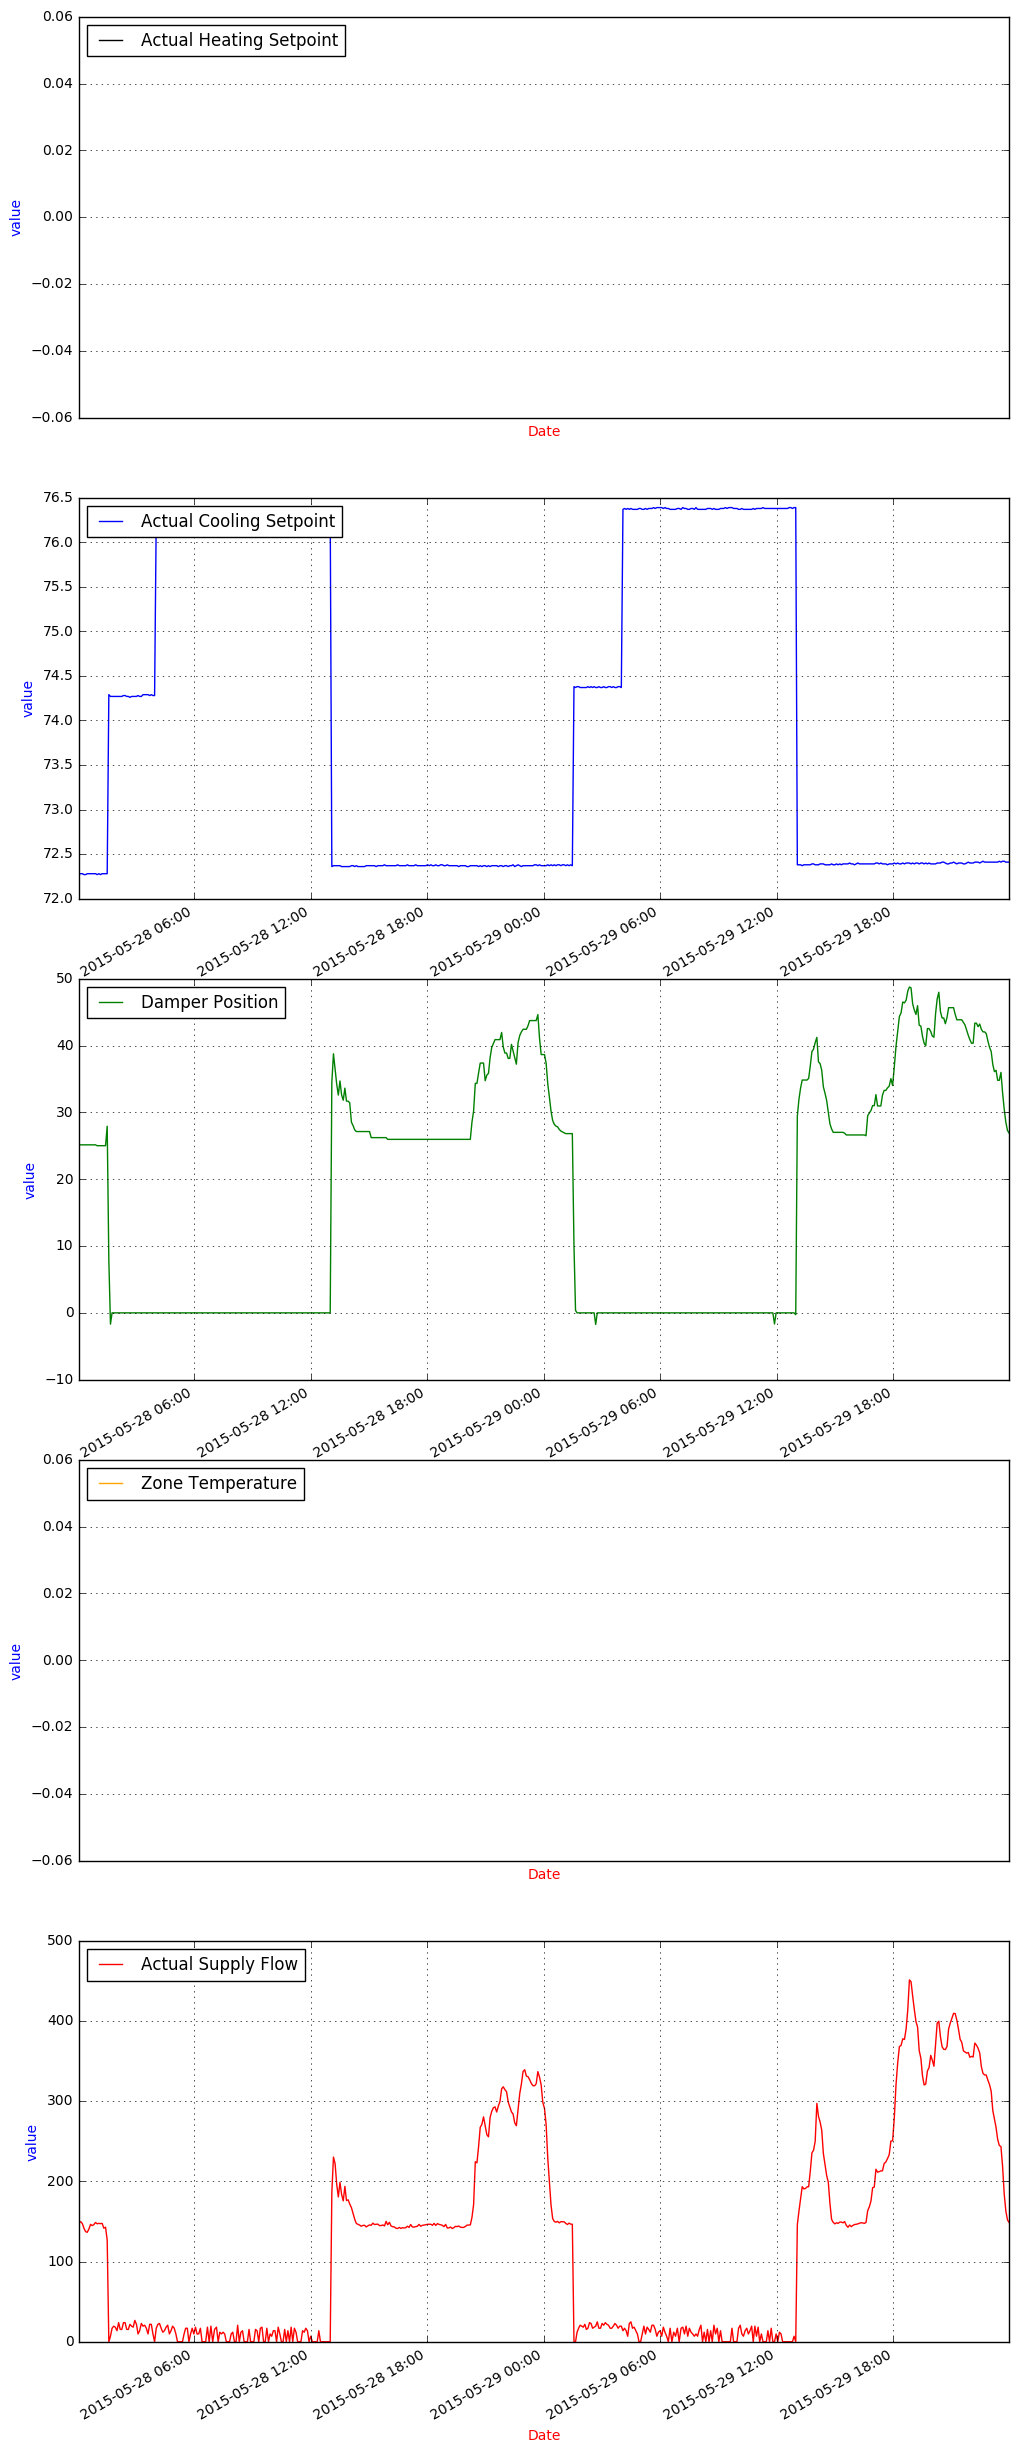

In [9]:
plot_signals_template(df, start_date="2015-05-28", end_date="2015-05-29")

### Winter  Plot  two consecutive dates "2015-02-06" and "2015-02-07"
#### Observations 2/06 - Friday
        1. Actual Supply workflow Tends to go up between 6 PM and 6 AM.
        2. Damper position is in corelation with Actual Supply workflow.
#### Observations 2/07 - Saturday
        1. Durimg Winter as Acutal Cooling setpoint goes up Damper position goes down. 
        2. Damper position is in corelation with Actual Cooling Setpoint.
        3. Damper position is zero for entire Satrurday so as Actual Supply workflow.
        4. Damper position goes up during 6PM - 6 AM.
        


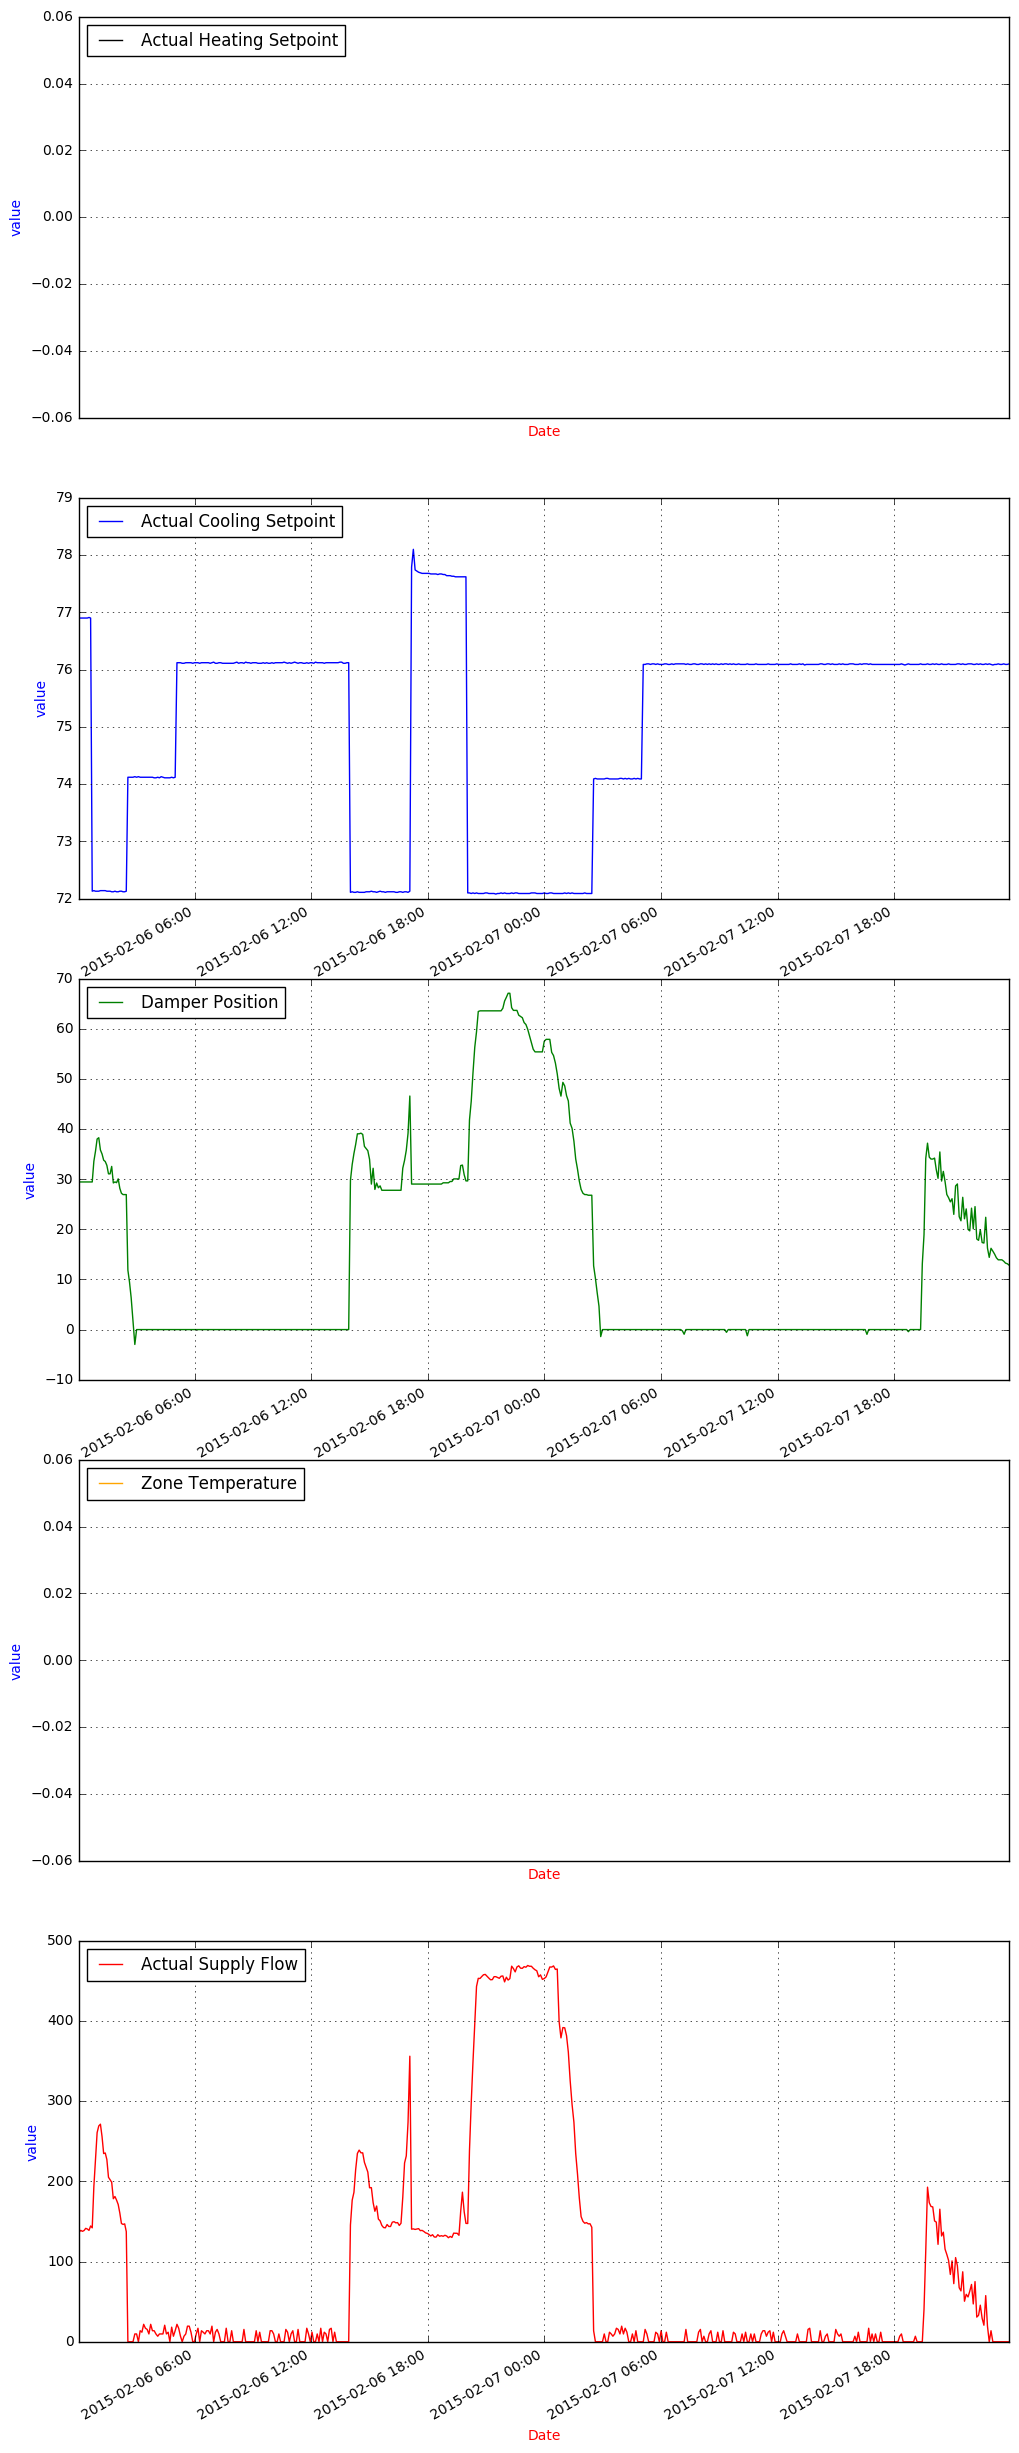

In [10]:
plot_signals_template(df,  start_date="2015-02-06", end_date="2015-02-07")

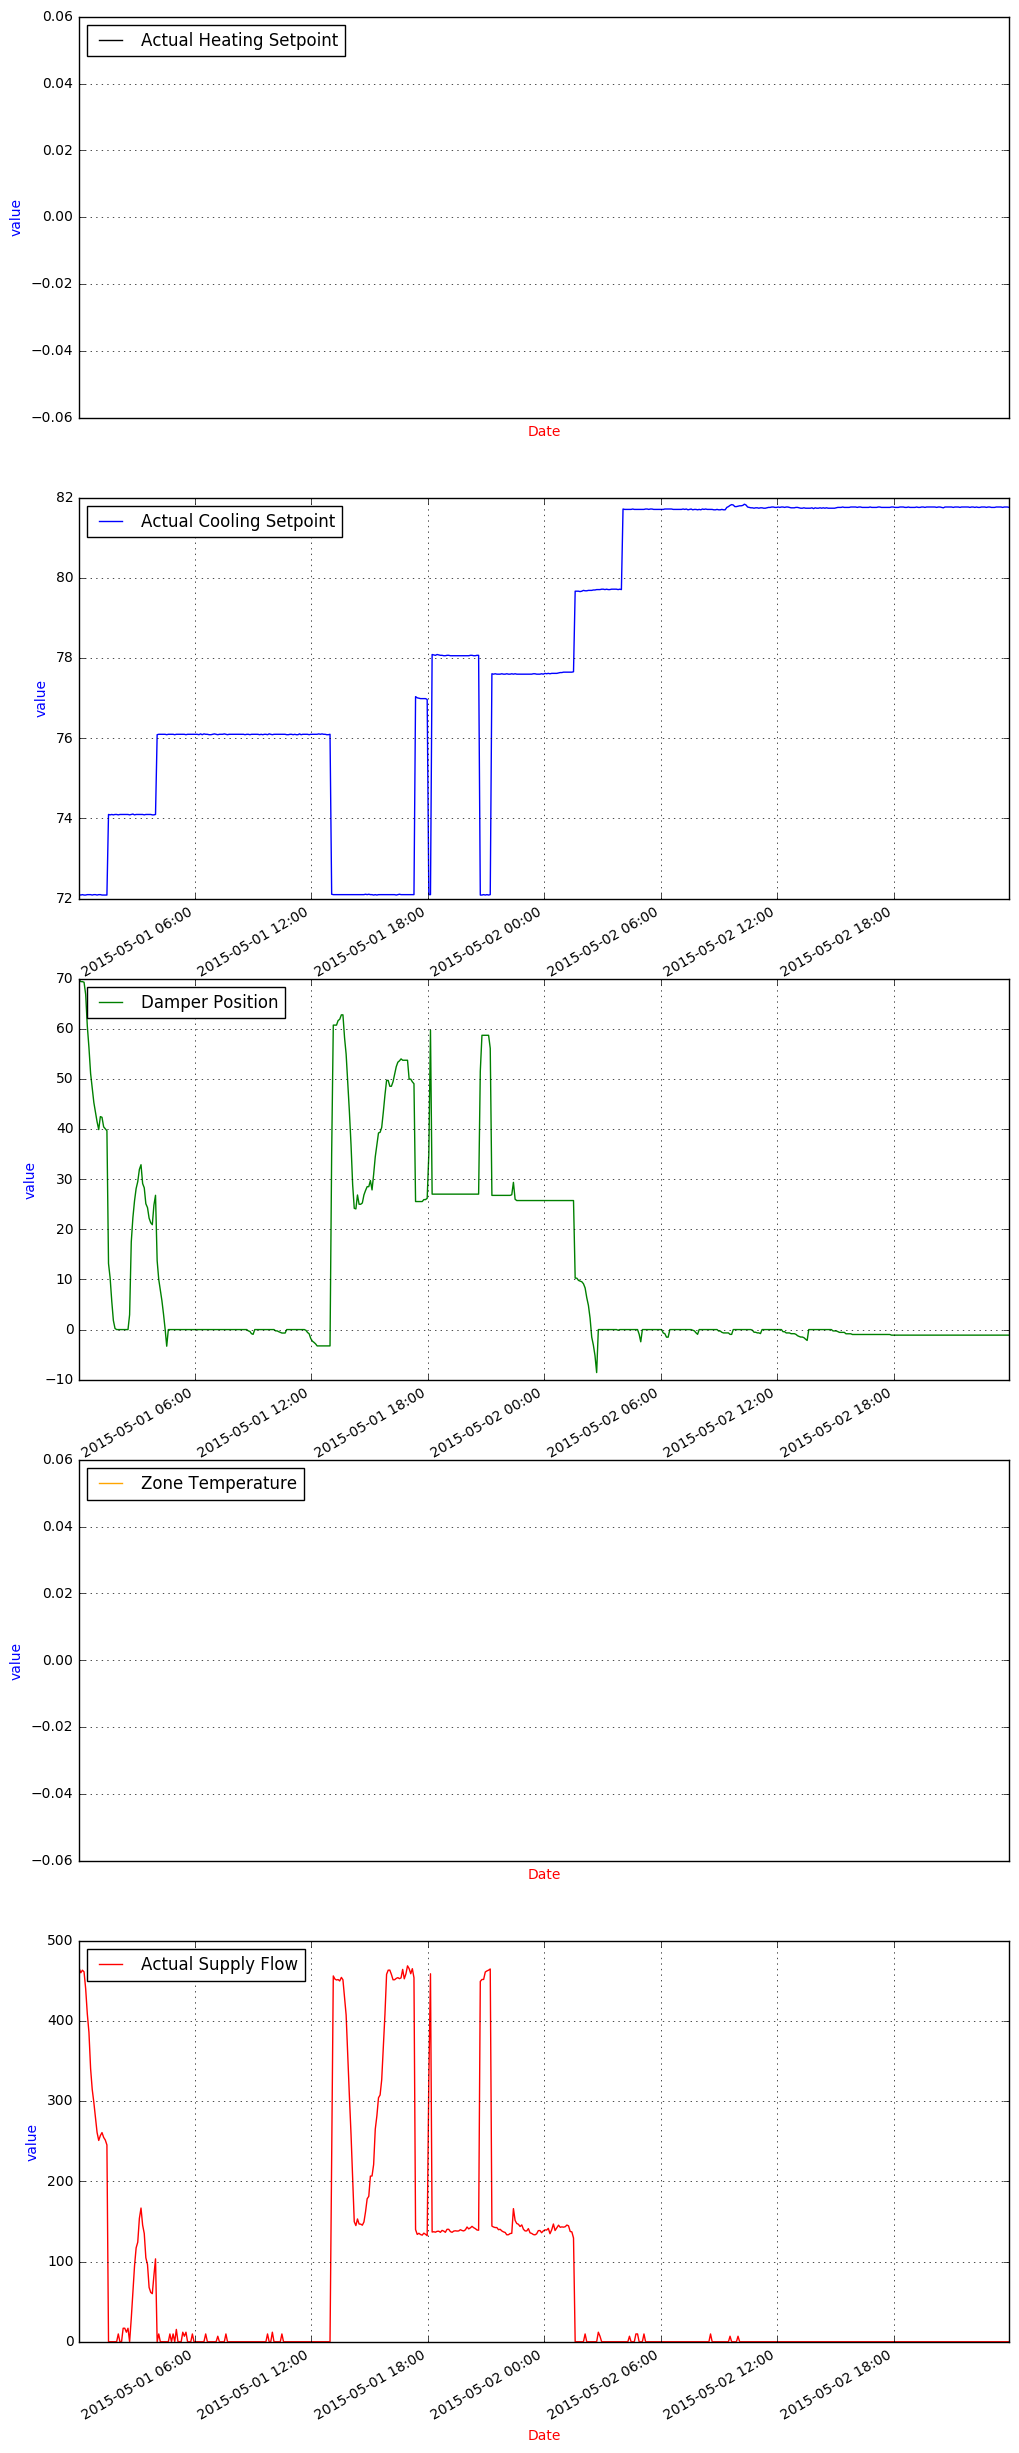

In [11]:
plot_signals_template(df,  start_date="2015-05-01", end_date="2015-05-02")